In [1]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [9]:
# ---------------------DUOMENU VALYMAS IR PARUOSIMAS MOKYMUI-------------------------

from sklearn.preprocessing import LabelEncoder

phone = pd.read_csv('data/smartphone_v2.csv', sep=',')

label_encoder = LabelEncoder()

# unique_brand_names = phone['brand_name'].unique()
# brand_name_mapping = {name: idx for idx, name in enumerate(unique_brand_names)}
# phone['brand_name_encoded'] = phone['brand_name'].map(brand_name_mapping)

# unique_model_names = phone['model'].unique()
# model_mapping = {name: idx for idx, name in enumerate(unique_model_names)}
# phone['model_encoded'] = phone['model'].map(model_mapping)

unique_proccesor_names = phone['processor_brand'].unique()
proccesor_mapping = {name: idx for idx, name in enumerate(unique_proccesor_names)}
phone['proccesor_encoded'] = phone['processor_brand'].map(proccesor_mapping)

unique_has_5g_names = phone['has_5g'].unique()
has_5g_mapping = {name: idx for idx, name in enumerate(unique_has_5g_names)}
phone['has_5g_encoded'] = phone['has_5g'].map(has_5g_mapping)

unique_os_names = phone['os'].unique()
os_mapping = {name: idx for idx, name in enumerate(unique_os_names)}
phone['os_encoded'] = phone['os'].map(os_mapping)



phone = phone.drop(['model'], axis=1)
phone = phone.drop(['brand_name'], axis=1)
phone = phone.drop(['resolution'], axis=1)
phone = phone.drop(['processor_brand'], axis=1)
phone = phone.drop(['has_nfc'], axis=1)
phone = phone.drop(['has_ir_blaster'], axis=1)
phone = phone.drop(['num_cores'], axis=1)
phone = phone.drop(['processor_speed'], axis=1)
phone = phone.drop(['refresh_rate'], axis=1)
phone = phone.drop(['num_rear_cameras'], axis=1)
phone = phone.drop(['num_front_cameras'], axis=1)
phone = phone.drop(['extended_upto'], axis=1)
phone = phone.drop(['fast_charging'], axis=1)
phone = phone.drop(['os'], axis=1)
phone = phone.drop(['has_5g'], axis=1)
phone = phone.drop(['ram_capacity'], axis=1)
phone = phone.drop(['extended_memory_available'], axis=1)
phone = phone.drop(['rating'], axis=1)




phone = phone.dropna()

phone['price']= phone['price'].fillna(phone['price'].mean())
# phone['rating']= phone['rating'].fillna(phone['rating'].mean())



phone

,price,battery_capacity,fast_charging_available,internal_memory,screen_size,primary_camera_rear,primary_camera_front,proccesor_encoded,has_5g_encoded,os_encoded
0,54999,5000.0,1,256.0,6.70,50.0,16.0,0,0,0
1,19989,5000.0,1,128.0,6.59,64.0,16.0,0,0,0
2,16499,5000.0,1,64.0,6.60,50.0,13.0,1,0,0
3,14999,5000.0,1,128.0,6.55,50.0,16.0,0,0,0
4,24999,5000.0,1,128.0,6.70,108.0,16.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...
975,34990,5000.0,1,128.0,6.67,64.0,16.0,0,0,0
976,14990,5000.0,1,128.0,6.50,48.0,8.0,0,0,0
977,28990,5080.0,1,256.0,6.60,64.0,16.0,2,0,0
978,19990,5000.0,1,128.0,6.80,108.0,32.0,0,0,0


In [3]:
# ---------------------RANDOM FOREST MODEL-------------------------


X = phone.drop(['price'], axis=1)

Y = phone['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.02072538860103627


In [17]:
# ---------------------RANDOM FOREST REGRESSOR MODEL-------------------------
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_RandomForestRegressor = r2_score(y_test, y_pred)
print(f'le scoras: {r2_RandomForestRegressor}')



le scoras: 0.7271112626148946


In [19]:
# ---------------------GradientBoostingRegressor-------------------------
import joblib
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

X = phone.drop(['price'], axis=1)
Y = phone['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X, Y)

reg.predict(X_test)

reg_score_GradientBoostingRegressor = reg.score(X_test, y_test)

print(reg_score_GradientBoostingRegressor)
# joblib.dump(reg, 'regression_model.joblib')




0.9140335230233277


In [37]:
# ---------------------GridSearchCV MODEL-------------------------

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

model_RandForest = RandomForestClassifier()

model_LogisticR = LinearRegression()

param_grid = {
    'n_estimators': [10, 50, 100, 200], # medziu kiekis
    'max_depth': [None, 10, 20], # sprendimu kiekis medyje
    'min_samples_split': [2, 5, 10] # minimalus pavyzdžių kiekis
}

linear_param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False]
}

grid_search_randF = GridSearchCV(estimator=model_RandForest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_randF.fit(X,Y)

grid_search_logisticR = GridSearchCV(estimator=model_LogisticR, param_grid= linear_param_grid, cv=5, scoring='accuracy')
grid_search_logisticR.fit(X,Y)

print(f'Geriausi parametrai Random forest: {grid_search_randF.best_params_}')
print(f'Geriausias tikslumas Random forest: {grid_search_randF.best_score_}')

print(f'Geriausi parametrai LogisticR: {grid_search_logisticR.best_params_}')
print(f'Geriausias tikslumas LogisticR: {grid_search_logisticR.best_score_}')

c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Geriausi parametrai Random forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Geriausias tikslumas Random forest: 0.05183044315992293
Geriausi parametrai LogisticR: {'copy_X': True, 'fit_intercept': True}
Geriausias tikslumas LogisticR: nan


c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * s

In [24]:
# ---------------------LOGISTIC REGRESSION WITH POLYMONIAL FEATURES MODEL-------------------------

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score



polynomia = PolynomialFeatures(degree=2)
X_poly = polynomia.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=11)

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_LogisticRegressionPolymonial = r2_score(y_test, y_pred)
print(f'le scoras: {r2_LogisticRegressionPolymonial}')



le scoras: 0.6730805999480174


In [25]:
# ---------------------LOGISTIC REGRESSION MODEL-------------------------

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=11)


scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=10000)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_LogisticRegression = r2_score(y_test, y_pred)
print(f'le scoras: {r2_LogisticRegression}')

le scoras: 0.6730805999480174


C:\Users\sarun\AppData\Local\Temp\ipykernel_10096\1016629666.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(am, rotation=45)


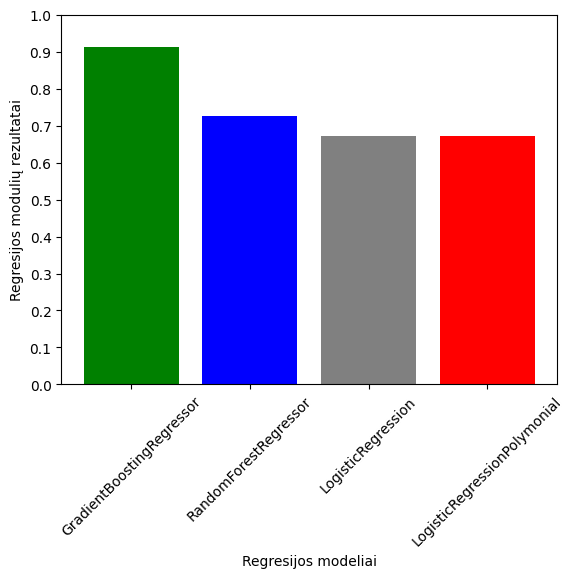

In [44]:
am = ['GradientBoostingRegressor','RandomForestRegressor','LogisticRegression','LogisticRegressionPolymonial']

fig, ax = plt.subplots()


ax.bar("GradientBoostingRegressor", reg_score_GradientBoostingRegressor, color='green', label="GradientBoostingRegressor")
ax.bar("RandomForestRegressor", r2_RandomForestRegressor, color='blue', label="RandomForestRegressor")
ax.bar('LogisticRegression', r2_LogisticRegression, color='grey', label="LogisticRegression")
ax.bar('LogisticRegressionPolymonial', r2_LogisticRegressionPolymonial, color='red', label="LogisticRegressionPolymonial")
ax.set_xticklabels(am, rotation=45)
ax.set_ylim([0,1])
ax.set_yticks([i * 0.1 for i in range(11)])

ax.set_ylabel('Regresijos modulių rezultatai')
ax.set_xlabel('Regresijos modeliai')
plt.show()